In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df=pd.read_csv('AQI-and-Lat-Long-of-Countries.csv')
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [7]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [9]:
df.isnull().sum()

AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64

In [15]:
df.shape

!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB
None

Summary Statistics:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        

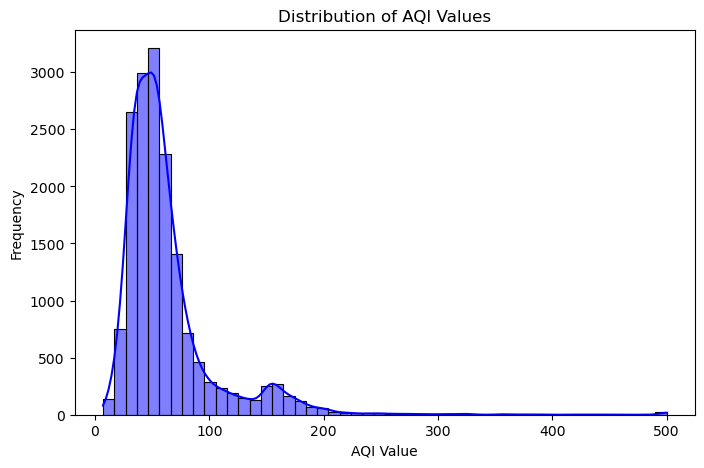

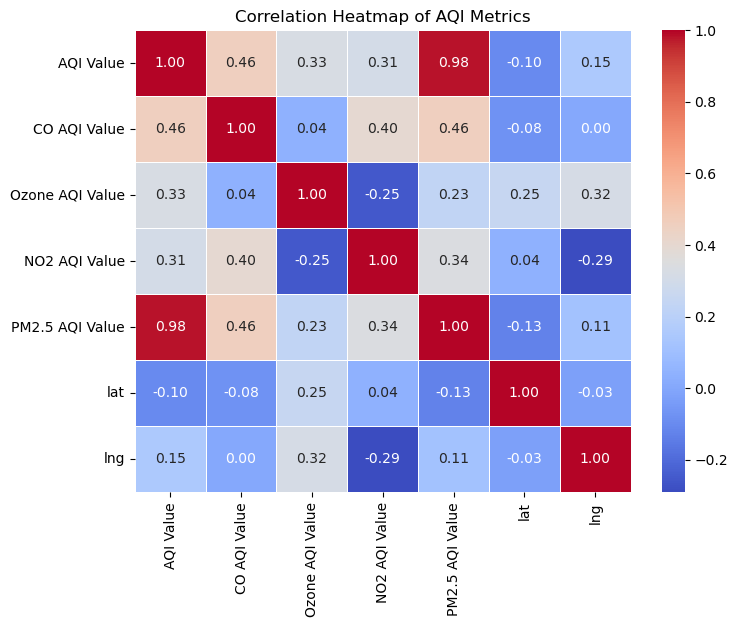

In [19]:
file_path = "AQI-and-Lat-Long-of-Countries.csv"  
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(8, 5))
sns.histplot(df["AQI Value"], bins=50, kde=True, color="blue")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Values")
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of AQI Metrics")
plt.show()


map_center = [df["lat"].median(), df["lng"].median()]
m = folium.Map(location=map_center, zoom_start=2)


heat_data = list(zip(df["lat"], df["lng"], df["AQI Value"]))
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)


m.save("AQI_Heatmap.html")


m


In [29]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


m1=RandomForestRegressor()


train1=df.drop(['AQI Value'], axis=1)

target=df['AQI Value']

print(target)

m1.fit(train1, target)

m1.score(train1, target)*100


prediction_result= m1.predict([[1, 10, 5, 11, 10, 5]])


print(prediction_result)

0        51
1        41
2        41
3        66
4        34
         ..
16690    54
16691    71
16692    71
16693    50
16694    71
Name: AQI Value, Length: 16695, dtype: int64
[9.85]


C:\Users\Kamlekar Sravani\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
import warnings 
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor



m2 = AdaBoostRegressor()


m2.fit(train1, target)



m2.score(train1, target)*100

#m2.predict([[1, 45, 67, 34, 5, 23]])

92.83768974095118